In [1]:
import sys
sys.path.append('..')

from src.phase_transition import (
    phase_transition_analysis,
    plot_phase_transition,
    finite_size_analysis,
    plot_finite_size_effects,
    analyze_transition_sharpness,
    analyze_divergence_at_criticality,
    plot_divergence_analysis,
    calculate_giant_component_scaling,
    plot_giant_component_scaling
)
import numpy as np

In [2]:
results = phase_transition_analysis(
    N=1000,
    k_min=0,
    k_max=5,
    step_coarse=0.1,
    step_fine=0.02,
    critical_window=(0.8, 1.2),
    num_realizations=50
)

print(f"Simulated {len(results['k_values'])} different <k> values")
print(f"Order parameter range: {results['order_parameter'].min():.3f} to {results['order_parameter'].max():.3f}")


Simulated 63 different <k> values
Order parameter range: 0.001 to 0.994


## part a

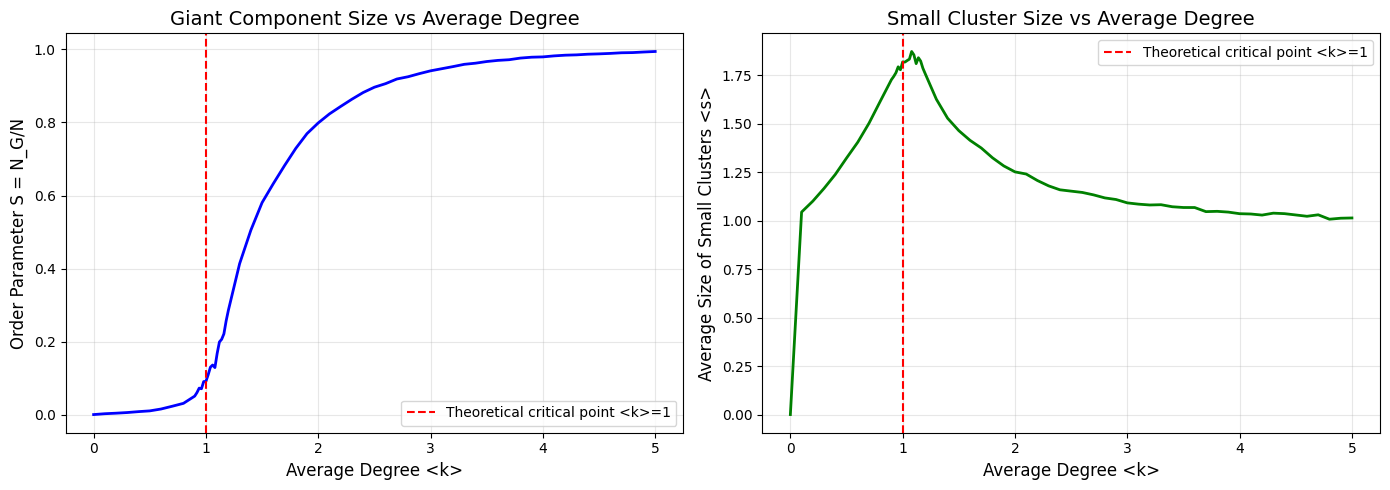

In [3]:
fig1 = plot_phase_transition(results)

## part b

In [4]:
critical_idx = np.argmin(np.abs(results['k_values'] - 1.0))
k_critical = results['k_values'][critical_idx]
S_critical = results['order_parameter'][critical_idx]

print(f"Critical point from simulation: <k> = {k_critical:.3f}")
print(f"Order parameter at critical point: S = {S_critical:.3f}")
print(f"Theoretical critical point: <k> = 1.0")
print(f"Deviation: {abs(k_critical - 1.0):.3f}")

peak_idx = np.argmax(results['avg_cluster_size'])
k_peak = results['k_values'][peak_idx]
s_peak = results['avg_cluster_size'][peak_idx]

print(f"\nPeak in average cluster size:")
print(f"  Location: <k> = {k_peak:.3f}")
print(f"  Peak value: <s> = {s_peak:.3f}")

Critical point from simulation: <k> = 1.000
Order parameter at critical point: S = 0.092
Theoretical critical point: <k> = 1.0
Deviation: 0.000

Peak in average cluster size:
  Location: <k> = 1.080
  Peak value: <s> = 1.874


## part c

In [6]:
k_values_finite = np.linspace(0.5, 1.5, 30)
N_values = [100, 1000, 10000]

finite_results = finite_size_analysis(k_values_finite, N_values, num_realizations=50)


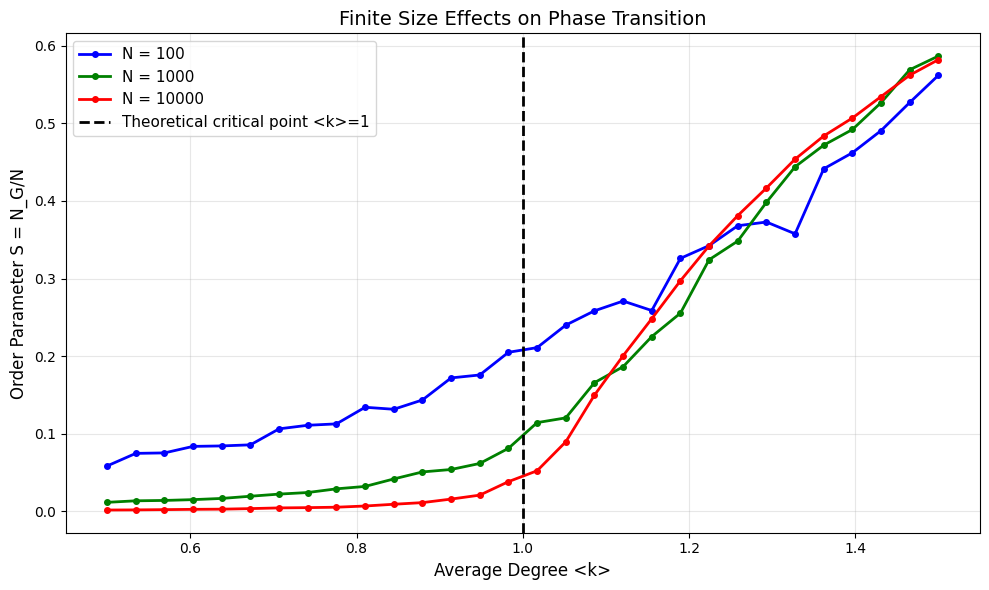

In [7]:
fig2 = plot_finite_size_effects(k_values_finite, finite_results)

In [8]:
sharpness = analyze_transition_sharpness(k_values_finite, finite_results)

print("Transition Sharpness Analysis:")
for N, sharp in sharpness.items():
    print(f"  N = {N:5d}: slope = {sharp:.3f}")

Transition Sharpness Analysis:
  N =   100: slope = 0.508
  N =  1000: slope = 0.569
  N = 10000: slope = 0.744


In [9]:
print("\nGiant Component Size at <k> = 1:")
for N in N_values:
    idx = np.argmin(np.abs(k_values_finite - 1.0))
    S = finite_results[N][idx]
    print(f"  N = {N:5d}: S = {S:.4f}")


Giant Component Size at <k> = 1:
  N =   100: S = 0.2110
  N =  1000: S = 0.1144
  N = 10000: S = 0.0524


## pard d

In [10]:
divergence_results = analyze_divergence_at_criticality(
    N_values=[100, 1000, 10000],
    k_critical=1.0,
    k_range=0.5,
    num_points=25,
    num_realizations=50
)

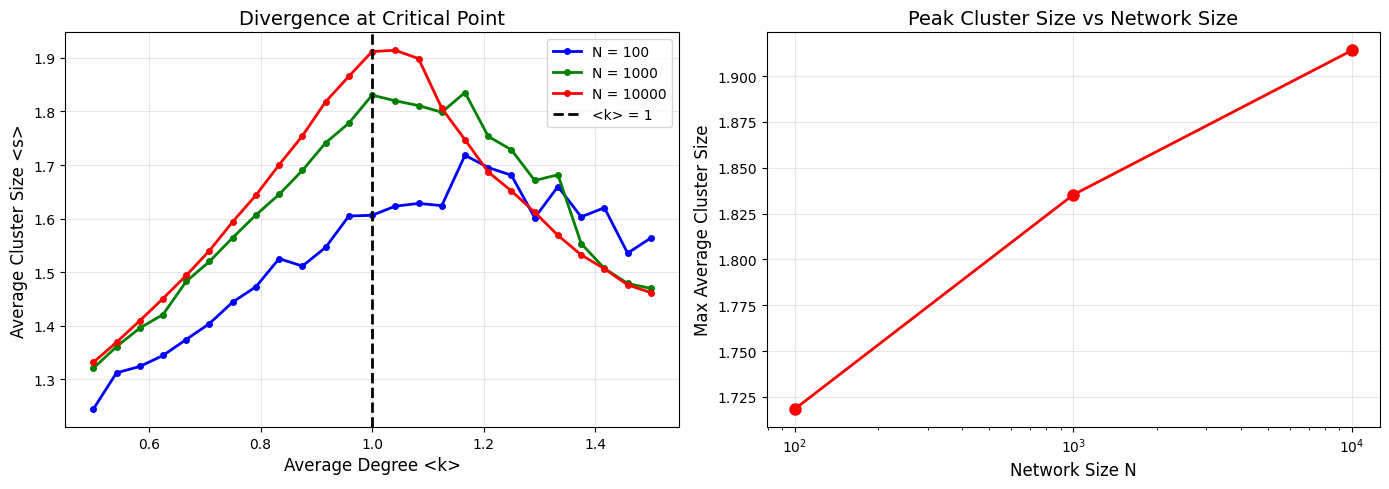

In [11]:
fig3 = plot_divergence_analysis(divergence_results)

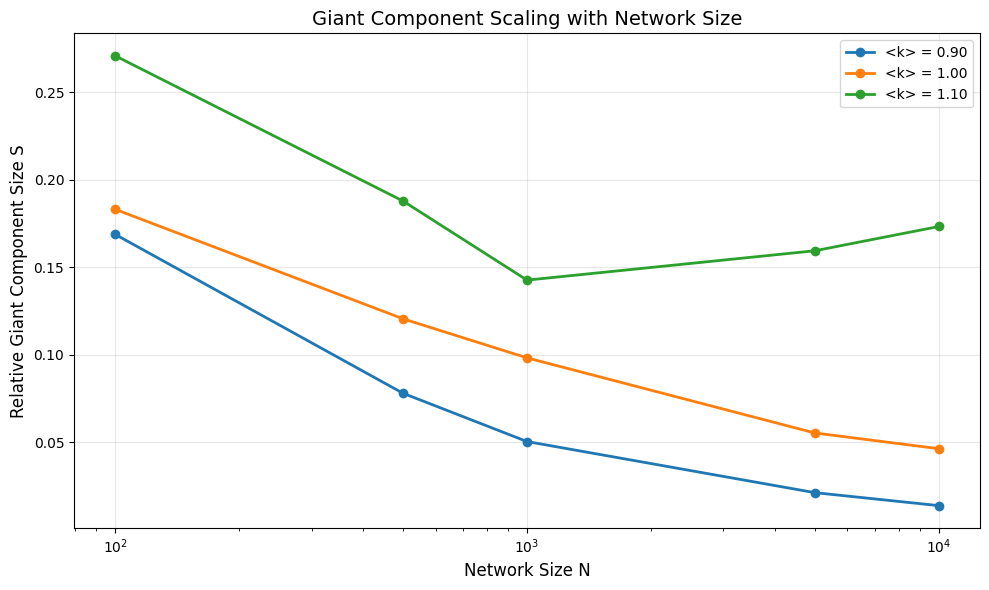

In [12]:
k_values_near = [0.9, 1.0, 1.1]
scaling_results = calculate_giant_component_scaling(
    N_values=[100, 500, 1000, 5000, 10000],
    k_values_near_critical=k_values_near,
    num_realizations=30
)

fig4 = plot_giant_component_scaling(
    N_values=[100, 500, 1000, 5000, 10000],
    scaling_results=scaling_results
)
